# Analyses of $r_m$ vs distribution of traits' $T_{pk}$'s

In [412]:
######### Analyses of $r_m$ vs distribution of traits' $T_{pk}$'s #########

rm(list=ls())
graphics.off()

require('tidyverse')

In [413]:
##### $r_m$ vs Variance of trait  $T_{pk}$'s ####

# AllTpks <- as_tibble(read_csv('../data/AllTpkParams.csv'))
rm_data <- as_tibble(read_csv('../data/rm_optSizeScaling.csv'))

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$rmTpk+273.15))

head(rm_data)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  curve_ID = col_double(),
  species = col_character(),
  rmTpk = col_double(),
  rm_opt = col_double(),
  rm_optLwr = col_double(),
  rm_optUpr = col_double(),
  mass = col_double()
)




curve_ID,species,rmTpk,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000,38.45119
10,Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000,37.96949
11,Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000,37.89130
12,Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000,39.20606
13,Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000,38.39961
14,Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714,38.47416


In [414]:
############ Relationship of $r_{m,opt}$ vs distribution of trait $T_{pk}$'s ######

#=======================================================
# sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

# write_csv(AllTpks, '../results/AllTpkParams.csv')

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Bemisia tabaci,29.751,29.39564,30.66724,juvenile development rate
topt,Tetraneura nigriabdominalis,30.648,30.53870,30.77909,juvenile development rate
topt,Stethorus punctillum,32.875,32.77700,33.02696,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.95749,35.79866,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.81551,32.66452,juvenile development rate
topt,Aphis nasturtii,30.874,29.88119,31.91956,juvenile development rate


In [415]:
load("../results/rm_MTE_model.Rdata") # Load linear model fitted in previous step (04_rmCalcs)

In [416]:
# summary(rm_model)

In [417]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor = rm_opt/mass^coef(rm_model)[2])
         
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

In [419]:
PlotData <- left_join(rm_data, OptVar, by="species")
PlotData <- left_join(PlotData, OptSum, by="species")
head(PlotData)

write_csv(PlotData,'../results/rm_optSizeScaling_w_tpksums.csv')

curve_ID,species,rmTpk,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000,38.45119,0.03373914,59.55748,90.45300
10,Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000,37.96949,0.23749010,80.41428,95.21000
11,Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000,37.89130,0.28507450,87.08893,97.77437
12,Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000,39.20606,0.05633105,46.36888,103.13400
13,Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000,38.39961,0.23271218,61.52582,87.82000
14,Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714,38.47416,0.10346153,35.51883,95.84500


In [438]:
# load simulaion results, filtering by only r_opt values of rows with predicted optimal order of T_pk's 

sim_results <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 1) 
head(sim_results)

,T_pk_sums,T_pk_vars,r_m_opt,T_opt,Opt_T_pk_order
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81.53854,103.71849,0.07250142,16.05,1
2,65.22241,114.33503,-0.01005402,10.30,1
3,84.72659,138.90059,0.03974080,13.45,1
4,80.22064,113.52081,0.05692468,14.55,1
5,61.86317,97.56244,0.04888265,13.70,1
6,91.28361,88.64286,0.12810141,19.20,1


## $r_m$ vs Sum of trait  $T_{pk}$'s

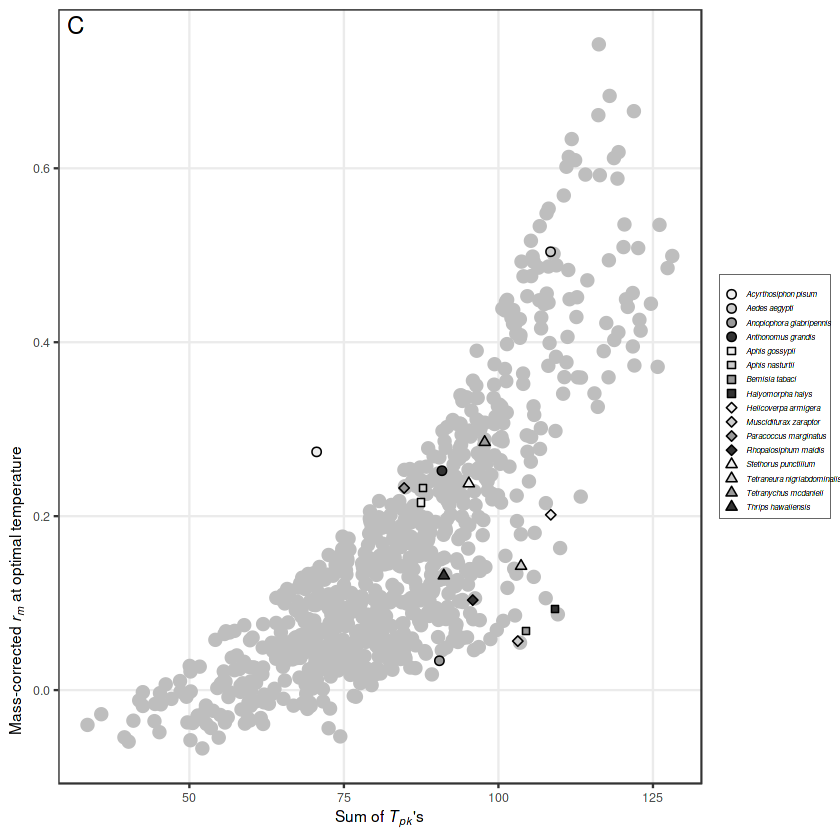

In [479]:
SumTpks_plot <-ggplot() +
  geom_point(data = sim_results, aes(x = T_pk_sums, y = r_m_opt), color="gray", size = 3) +
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at optimal temperature"))),
                     # limits=c(-3.8,-0.5),
                     # expand = c(0.01, 0),breaks=seq(-3,-1, by=1)
                    ) +
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s")))) +
  theme_bw()+
  theme(text=element_text(family="Times")) + 
  geom_point(data = PlotData, aes(x = sum, y = rm_massCor, shape=species, fill=species), 
             size=2, stroke=.5)+ 
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5)) + 
  theme(text = element_text(size=9),
        legend.position = 'right',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(hjust=0.1), panel.grid.minor = element_blank())

SumTpks_plot

ggsave("../results/Figs/rm_vs_SumTpks.pdf", SumTpks_plot, height=6.5, width = 10, units="cm")

In [464]:
# SumTpks_plot <-
#   PlotData %>%
#   ggplot(aes(x = sum, y = rm_massCor))+
#   # geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
#   scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",
#                                             italic(M^-0.16),"))"))),
#                      # limits=c(-3.8,-0.5),
#                      # expand = c(0.01, 0),breaks=seq(-3,-1, by=1)
#                     ) +
#   scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
#   geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
#   scale_shape_manual(values = c(21,21,21,21,
#                                 22,22,22,22,
#                                 23,23,23,23,
#                                 24,24,24,24),
#                      name=expression(bold("")),
#                      guide = guide_legend(nrow=16,ncol=1,
#                                           direction = "vertical",
#                                           title.position = "top",
#                                           title.hjust=0.5))+
#   scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
#                                "#EEEEEE","#CCCCCC","#999999","#333333",
#                                "#EEEEEE","#CCCCCC","#999999","#333333",
#                                "#EEEEEE","#CCCCCC","#999999","#333333"),
#                     name=expression(bold("")),
#                     guide = guide_legend(nrow=16,ncol=1,
#                                          direction = "vertical",
#                                          title.position = "top",
#                                          title.hjust=0.5))+
#   scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
#                                  "#333333","#333333","#333333","#333333",
#                                  "#333333","#333333","#333333","#333333",
#                                  "#333333","#333333","#333333","#333333"),
#                       name=expression(bold("")),
#                       guide = guide_legend(nrow=16,ncol=1,
#                                            direction = "vertical",
#                                            title.position = "top",
#                                            title.hjust=0.5))+
#   theme_bw()+
#   theme(text=element_text(family="Times"))+
#   theme(text = element_text(size=9),
#         legend.position = 'right',
#         legend.text = element_text(size = 4.5, face = 'italic'),
#         legend.background = element_rect(colour = "black", size = 0.125), 
#         legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
#         legend.key.size = unit(0.3, 'cm'))+
#   geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
#                 label = "C"),size = 5, colour = "black")+
#   theme(axis.title.y = element_text(hjust=0.1), panel.grid.minor = element_blank())


## $r_m$ vs Variance of trait  $T_{pk}$'s 

In [387]:
VarLM <-   lm(PlotData$rm_massCor ~ PlotData$variance)

summary(VarLM)


Call:
lm(formula = PlotData$rm_massCor ~ PlotData$variance)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4639 -0.3107  0.1560  0.3078  0.9337 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.864364   0.529537  -5.409 9.21e-05 ***
PlotData$variance  0.015769   0.007876   2.002    0.065 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6453 on 14 degrees of freedom
Multiple R-squared:  0.2226,	Adjusted R-squared:  0.1671 
F-statistic: 4.009 on 1 and 14 DF,  p-value: 0.06503


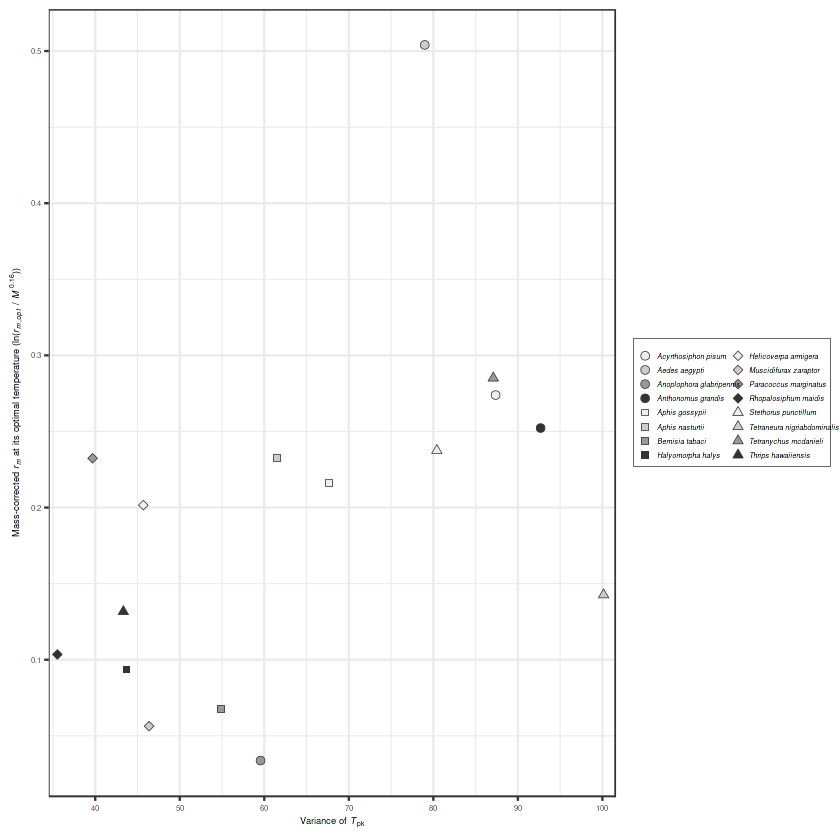

In [411]:
Var_rm <- ggplot(PlotData, aes(x=variance, y=rm_massCor, colour = species, fill = species)) +
  theme_bw(base_size = 12.5) +
  scale_x_continuous(expression(plain(paste("Variance of ", italic(T)[pk]))),
                     limits =c(34.5,101.5),
                     expand = c(0, 0),
                     breaks=seq(40,100, by=10))+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at its optimal temperature (ln(",italic(r[paste(m,",", opt)]),
                                            " / ", italic(M^-0.16),"))"))),
                     # limits=c(-3.8,-0.5),
                     # expand = c(0.01, 0),
                     # breaks=seq(-3,-1, by=1)
                    )+
  # geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=5.25),
        legend.position = 'right',
        legend.text = element_text(size = 4, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))
  
Var_rm

# ggsave("../results/Figs/rm_vs_VarTpks.pdf", Var_rm, height=6.5, width = 11, units="cm")

## Relationship between Sum and Variance of trait $T_{pk}$'s 

`geom_smooth()` using formula 'y ~ x'



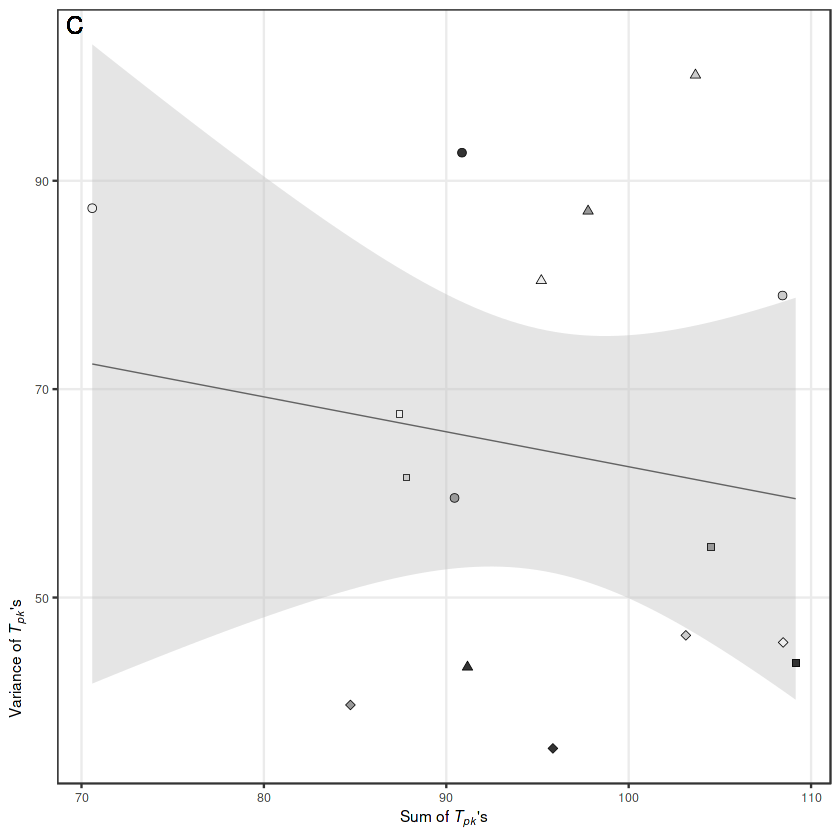

In [405]:
######### Relationship between Sum and Variance of trait $T_{pk}$'s ########

Sum_vs_Var_Tpks_plot <- PlotData %>%
  ggplot(aes(x = sum, y = variance))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Variance of ",italic("T"[pk]),"'s"))))+

  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(hjust=0.1),
        panel.grid.minor = element_blank())

Sum_vs_Var_Tpks_plot